In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Rishi\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
import os
notebook_path = os.getcwd()
print("Your notebook is in this folder:")
print(notebook_path)


Your notebook is in this folder:
C:\Users\Rishi


In [3]:
import os
print(os.listdir())

['-1.14-windows.xml', '.anaconda', '.cache', '.chatgpt', '.conda', '.condarc', '.continuum', '.Icecream PDF Editor', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.vscode', '3D Objects', 'AIR BNB NY.ipynb', 'AppData', 'Application Data', 'battery-report.html', 'Boston Crime Data Cleaning.ipynb', 'class.java', 'Contacts', 'Cookies', 'crime.csv', 'Documents', 'Downloads', 'Favorites', 'Links', 'Local Settings', 'Microsoft', 'Music', 'My Documents', 'NationalNames.csv', 'NetHood', 'new_york_listings_2024.csv', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{f7c9f98f-83da-11ef-b70e-e28c6791415a}.TM.blf', 'NTUSER.DAT{f7c9f98f-83da-11ef-b70e-e28c6791415a}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{f7c9f98f-83da-11ef-b70e-e28c6791415a}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'public class HelloWorld.js', 'Recent', 'Retail_Transaction_Dataset.csv', 'Sample_-_Superstore.xlsx', 'sample_sentiment_data.csv'


image 1/1 C:\Users\Rishi\test.jpg.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 293.4ms
Speed: 6.5ms preprocess, 293.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 480)


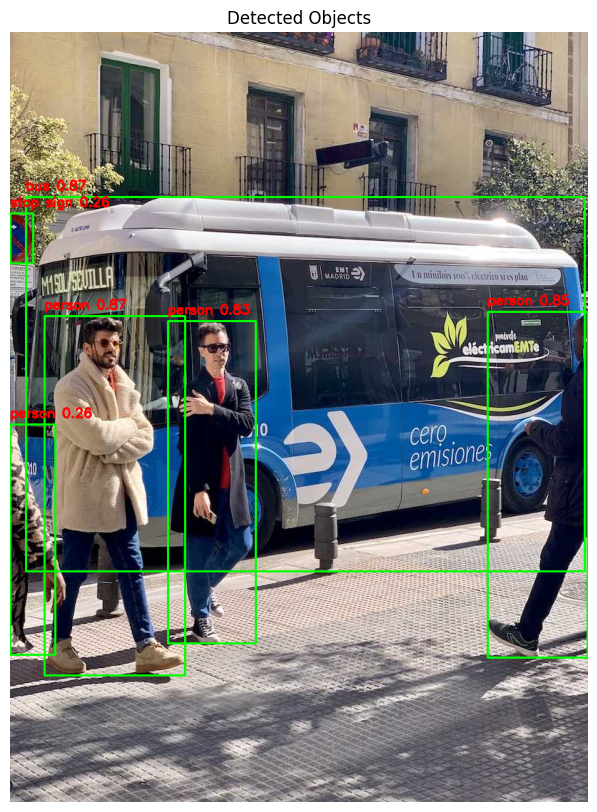

In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # This will download the model if not already present

# Load and detect on your image
img_path = "test.jpg.jpg"  # use the exact name as seen earlier
results = model(img_path)

# Show detection results (opens a pop-up window if supported)
results[0].show()

# Load image and prepare for drawing
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw bounding boxes and labels
for r in results:
    boxes = r.boxes.xyxy.cpu().numpy()
    classes = r.boxes.cls.cpu().numpy().astype(int)
    confs = r.boxes.conf.cpu().numpy()
    names = r.names

    for box, cls, conf in zip(boxes, classes, confs):
        x1, y1, x2, y2 = map(int, box)
        label = f"{names[cls]} {conf:.2f}"
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_rgb, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Display result inside notebook
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Detected Objects")
plt.show()
